In [ ]:
# Install dependencies
!pip install ultralytics roboflow

# Import libraries
from ultralytics import YOLO
from roboflow import Roboflow
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
# Download dataset from Roboflow
rf = Roboflow(api_key="WYxeLuU4ev3hFq3Oacrb")
project = rf.workspace("capstone-project-n2hsm").project("fire-smoke-detection-ua3dm-7sa7x")
version = project.version(1)
dataset_path = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-smoke-detection-1 in yolov8:: 100%|██████████| 4110/4110 [00:00<00:00, 4384.20it/s]


In [ ]:
data_yaml = "/content/fire-smoke-detection-1/data.yaml"

In [ ]:
# Train YOLOv8 model
model = YOLO("yolov8n.pt")  # Yolov8 nano for the lighter data
model.train(data=data_yaml, epochs=100, imgsz=640, batch=16, device='cuda')

100%|██████████| 6.25M/6.25M [00:00<00:00, 96.5MB/s]


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/fire-smoke-detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.3MB/s]


AMP: checks passed ✅


train: Scanning /content/fire-smoke-detection-1/train/labels... 1791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1791/1791 [00:00<00:00, 2229.88it/s]


train: New cache created: /content/fire-smoke-detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/fire-smoke-detection-1/valid/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 1480.83it/s]

val: New cache created: /content/fire-smoke-detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.08G      1.726       2.81      1.883         46        640: 100%|██████████| 112/112 [00:32<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        173        248      0.219      0.315      0.172     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.66G      1.777      2.443      1.879         73        640: 100%|██████████| 112/112 [00:30<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.19it/s]

                   all        173        248      0.275      0.214      0.141     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.68G      1.813      2.308      1.896         62        640: 100%|██████████| 112/112 [00:30<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]

                   all        173        248      0.255      0.231      0.153     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.69G      1.827      2.283      1.881         52        640: 100%|██████████| 112/112 [00:28<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]


                   all        173        248      0.281      0.306      0.165     0.0586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.71G      1.788      2.188      1.861         50        640: 100%|██████████| 112/112 [00:28<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

                   all        173        248      0.435      0.239       0.23     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.73G      1.754      2.149      1.833         58        640: 100%|██████████| 112/112 [00:28<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.40it/s]

                   all        173        248      0.367       0.21      0.183     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.74G      1.754       2.07      1.803         41        640: 100%|██████████| 112/112 [00:29<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]

                   all        173        248      0.386      0.339      0.307      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.76G      1.705      1.999      1.786         51        640: 100%|██████████| 112/112 [00:28<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]

                   all        173        248      0.414      0.335      0.312       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.78G      1.704       1.95      1.777         46        640: 100%|██████████| 112/112 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        173        248      0.396      0.266      0.269      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.79G      1.691      1.938      1.766         60        640: 100%|██████████| 112/112 [00:29<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]

                   all        173        248      0.439      0.456      0.393      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.81G       1.66      1.866      1.746         59        640: 100%|██████████| 112/112 [00:29<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]

                   all        173        248      0.395      0.339      0.273     0.0997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.83G       1.64      1.854      1.742         61        640: 100%|██████████| 112/112 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        173        248      0.432      0.499      0.425      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.84G      1.592      1.803      1.702         49        640: 100%|██████████| 112/112 [00:30<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]

                   all        173        248      0.491      0.462      0.452      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.86G      1.581      1.753      1.688         46        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]

                   all        173        248      0.396        0.4      0.355      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.88G       1.57      1.725      1.675         52        640: 100%|██████████| 112/112 [00:29<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        173        248      0.465      0.444      0.429       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.89G      1.555      1.684      1.653         49        640: 100%|██████████| 112/112 [00:28<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]

                   all        173        248      0.428      0.412      0.356      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.91G      1.529       1.64      1.639         43        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        173        248      0.449      0.408      0.379       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.93G      1.537      1.667       1.65         44        640: 100%|██████████| 112/112 [00:28<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.28it/s]

                   all        173        248      0.592      0.425      0.452      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.95G      1.496      1.614      1.617         49        640: 100%|██████████| 112/112 [00:28<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all        173        248      0.551      0.383      0.426      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.96G       1.49      1.569      1.604         58        640: 100%|██████████| 112/112 [00:29<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        173        248      0.498      0.413      0.401      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.98G      1.469      1.531      1.584         58        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]

                   all        173        248      0.448      0.448       0.41      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         3G      1.456      1.531      1.589         38        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]

                   all        173        248      0.517      0.456      0.455       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.02G       1.44      1.432      1.562         55        640: 100%|██████████| 112/112 [00:31<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

                   all        173        248       0.53       0.42      0.444       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.03G      1.423      1.458      1.548         51        640: 100%|██████████| 112/112 [00:28<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.52it/s]

                   all        173        248      0.455        0.5       0.43      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.05G       1.38      1.395      1.537         39        640: 100%|██████████| 112/112 [00:29<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        173        248      0.432      0.443      0.409       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.07G      1.383      1.373      1.531         47        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

                   all        173        248      0.495      0.452      0.435       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.08G      1.366      1.362      1.509         67        640: 100%|██████████| 112/112 [00:29<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.04it/s]

                   all        173        248      0.595      0.382      0.454      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       3.1G      1.358      1.323      1.507         51        640: 100%|██████████| 112/112 [00:29<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all        173        248      0.472      0.435      0.444      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.12G      1.321      1.284      1.474         52        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]

                   all        173        248      0.498      0.468      0.456      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.13G      1.314       1.27      1.473         44        640: 100%|██████████| 112/112 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.10it/s]


                   all        173        248      0.527      0.452      0.464      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.15G      1.309      1.251      1.454         48        640: 100%|██████████| 112/112 [00:29<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]

                   all        173        248      0.533      0.395      0.397      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.17G      1.305      1.243      1.451         35        640: 100%|██████████| 112/112 [00:29<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.39it/s]

                   all        173        248      0.547      0.445      0.443      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.19G      1.264      1.213      1.431         48        640: 100%|██████████| 112/112 [00:29<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        173        248       0.64       0.43      0.499      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.2G      1.267       1.19      1.421         49        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]

                   all        173        248      0.396      0.404      0.356      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.22G      1.246       1.16      1.408         71        640: 100%|██████████| 112/112 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.61it/s]

                   all        173        248      0.479      0.452      0.421      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.24G      1.217      1.142      1.386         42        640: 100%|██████████| 112/112 [00:29<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.35it/s]

                   all        173        248      0.567      0.416      0.432      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.25G      1.211      1.133      1.401         40        640: 100%|██████████| 112/112 [00:35<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]

                   all        173        248      0.559      0.404      0.435       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.27G      1.196      1.084      1.373         53        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]

                   all        173        248      0.438      0.511      0.423       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.29G      1.163      1.068      1.352         46        640: 100%|██████████| 112/112 [00:28<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]

                   all        173        248      0.492      0.428       0.41      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.3G       1.15      1.054      1.343         56        640: 100%|██████████| 112/112 [00:30<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]

                   all        173        248      0.537       0.44      0.429      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.32G      1.166      1.051       1.35         49        640: 100%|██████████| 112/112 [00:29<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]

                   all        173        248      0.565      0.447      0.434      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.34G       1.15          1      1.336         56        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]


                   all        173        248       0.49      0.435      0.376      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.36G      1.109     0.9906      1.322         42        640: 100%|██████████| 112/112 [00:29<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]

                   all        173        248      0.545      0.445      0.445      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.37G      1.138      1.005      1.331         39        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]

                   all        173        248      0.461      0.448       0.38      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.39G      1.102     0.9517      1.307         56        640: 100%|██████████| 112/112 [00:29<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]

                   all        173        248      0.442      0.431      0.388      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.41G      1.099     0.9553      1.303         43        640: 100%|██████████| 112/112 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]

                   all        173        248      0.484      0.386      0.419      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.42G      1.078     0.9557      1.288         45        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]

                   all        173        248      0.408      0.415      0.369      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.44G       1.07     0.9499      1.279         46        640: 100%|██████████| 112/112 [00:29<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]

                   all        173        248      0.505      0.463      0.414      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.46G      1.048     0.9017      1.266         69        640: 100%|██████████| 112/112 [00:28<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]

                   all        173        248      0.593      0.363      0.415      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.48G      1.043      0.914       1.27         57        640: 100%|██████████| 112/112 [00:30<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]


                   all        173        248      0.448      0.494      0.424      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.49G      1.019     0.8409      1.251         43        640: 100%|██████████| 112/112 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.60it/s]

                   all        173        248      0.559       0.46      0.451      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.51G      1.007     0.8577      1.246         74        640: 100%|██████████| 112/112 [00:28<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.50it/s]

                   all        173        248      0.455      0.467      0.413      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.53G      1.016     0.8504      1.239         42        640: 100%|██████████| 112/112 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        173        248      0.576      0.404      0.415      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.54G     0.9973     0.8387       1.24         46        640: 100%|██████████| 112/112 [00:28<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.33it/s]

                   all        173        248      0.542      0.395      0.424      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.56G     0.9848     0.8272      1.227         34        640: 100%|██████████| 112/112 [00:28<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.32it/s]

                   all        173        248      0.455      0.492      0.415      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.58G     0.9724     0.8095      1.214         46        640: 100%|██████████| 112/112 [00:28<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        173        248      0.516      0.464      0.463       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       3.6G     0.9718     0.8124      1.214         53        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

                   all        173        248      0.531      0.439      0.422      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.61G     0.9436     0.7715       1.19         61        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]

                   all        173        248      0.548      0.403       0.43      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.63G     0.9633     0.8189      1.217         47        640: 100%|██████████| 112/112 [00:29<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.36it/s]

                   all        173        248       0.48      0.427      0.427      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.65G     0.9345     0.7691      1.183         51        640: 100%|██████████| 112/112 [00:30<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]

                   all        173        248      0.433      0.464      0.417      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.66G     0.9212     0.7659      1.185         50        640: 100%|██████████| 112/112 [00:28<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all        173        248      0.472      0.467      0.406      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.68G     0.9045     0.7492      1.179         52        640: 100%|██████████| 112/112 [00:28<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]

                   all        173        248      0.469      0.439      0.439      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.7G     0.8965     0.7395       1.17         49        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]

                   all        173        248      0.439      0.443      0.404      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.71G     0.8899     0.7164      1.165         53        640: 100%|██████████| 112/112 [00:29<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        173        248      0.418      0.435      0.389      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.73G      0.888     0.7257      1.158         40        640: 100%|██████████| 112/112 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.38it/s]

                   all        173        248      0.524      0.395      0.399       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.75G     0.8911     0.7321      1.164         44        640: 100%|██████████| 112/112 [00:28<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]

                   all        173        248      0.426      0.444      0.373      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.77G     0.8711     0.6999       1.15         42        640: 100%|██████████| 112/112 [00:29<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.36it/s]

                   all        173        248      0.555      0.391      0.426       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.78G     0.8377     0.6737       1.13         47        640: 100%|██████████| 112/112 [00:28<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]

                   all        173        248      0.478      0.415      0.402      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.8G     0.8512     0.6919      1.146         47        640: 100%|██████████| 112/112 [00:30<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        173        248      0.537      0.403      0.409      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.82G     0.8275     0.6775       1.13         55        640: 100%|██████████| 112/112 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]

                   all        173        248      0.669      0.326      0.402      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.83G     0.8283     0.6684      1.122         41        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]

                   all        173        248       0.48      0.452      0.409      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.85G     0.8379     0.6714      1.129         41        640: 100%|██████████| 112/112 [00:30<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all        173        248      0.454      0.411      0.371      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.87G     0.7972     0.6349      1.111         52        640: 100%|██████████| 112/112 [00:28<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.36it/s]

                   all        173        248      0.529       0.46      0.456       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.89G     0.8084     0.6422      1.118         62        640: 100%|██████████| 112/112 [00:29<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]


                   all        173        248      0.567      0.411       0.43      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.9G     0.7958     0.6367      1.114         39        640: 100%|██████████| 112/112 [00:29<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all        173        248      0.627      0.371      0.439      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.92G      0.802     0.6318      1.107         48        640: 100%|██████████| 112/112 [00:28<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]

                   all        173        248      0.576      0.386      0.415      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.94G     0.7857     0.6262      1.096         52        640: 100%|██████████| 112/112 [00:30<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.40it/s]

                   all        173        248      0.549      0.395      0.425      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.95G     0.7756     0.6064      1.093         43        640: 100%|██████████| 112/112 [00:30<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]

                   all        173        248      0.539       0.42      0.414      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.97G     0.7672     0.6063      1.088         37        640: 100%|██████████| 112/112 [00:29<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        173        248      0.511      0.417      0.409      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.99G     0.7569     0.5989      1.085         54        640: 100%|██████████| 112/112 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.44it/s]

                   all        173        248      0.519      0.411       0.42      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.01G     0.7496     0.6099      1.084         52        640: 100%|██████████| 112/112 [00:28<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]

                   all        173        248      0.509      0.411      0.404      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.02G     0.7425     0.5887      1.079         48        640: 100%|██████████| 112/112 [00:29<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        173        248      0.546      0.443      0.417      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.04G     0.7333     0.5755      1.069         60        640: 100%|██████████| 112/112 [00:28<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]

                   all        173        248      0.444       0.44      0.401      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.06G     0.7337     0.5827      1.073         60        640: 100%|██████████| 112/112 [00:28<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]

                   all        173        248      0.558      0.395      0.425      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.07G     0.7286     0.5822      1.069         50        640: 100%|██████████| 112/112 [00:29<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]

                   all        173        248      0.508      0.383      0.395      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.09G     0.7211     0.5705      1.066         64        640: 100%|██████████| 112/112 [00:28<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]

                   all        173        248       0.56      0.403      0.424      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.11G     0.7045     0.5534      1.056         47        640: 100%|██████████| 112/112 [00:29<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        248      0.573      0.344      0.371      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.12G     0.7018     0.5597      1.061         50        640: 100%|██████████| 112/112 [00:28<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]

                   all        173        248      0.469      0.468      0.408      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.14G     0.6882     0.5434      1.054         46        640: 100%|██████████| 112/112 [00:28<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        173        248      0.474      0.419      0.428      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.16G     0.6897      0.538      1.048         49        640: 100%|██████████| 112/112 [00:29<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]

                   all        173        248       0.47      0.456       0.42      0.176


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.18G     0.6367     0.4565      1.013         23        640: 100%|██████████| 112/112 [00:29<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

                   all        173        248      0.442      0.456      0.381      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.19G     0.5774     0.3989     0.9799         21        640: 100%|██████████| 112/112 [00:27<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.51it/s]

                   all        173        248      0.506      0.403      0.411      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.21G     0.5596     0.3818       0.97         24        640: 100%|██████████| 112/112 [00:28<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all        173        248      0.524      0.429      0.423       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.23G     0.5504     0.3732     0.9679         27        640: 100%|██████████| 112/112 [00:27<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]

                   all        173        248      0.429      0.464      0.423      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.24G     0.5384      0.362       0.96         30        640: 100%|██████████| 112/112 [00:27<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]

                   all        173        248      0.495      0.426      0.414      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.26G     0.5316     0.3638     0.9524         17        640: 100%|██████████| 112/112 [00:28<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        173        248      0.529      0.399      0.408      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.28G     0.5309     0.3525     0.9517         28        640: 100%|██████████| 112/112 [00:29<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]

                   all        173        248      0.541      0.418      0.432      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.29G     0.5255     0.3601     0.9572         26        640: 100%|██████████| 112/112 [00:27<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]

                   all        173        248      0.555      0.391      0.425      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.31G     0.5145     0.3472     0.9448         20        640: 100%|██████████| 112/112 [00:27<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]


                   all        173        248      0.543      0.371      0.422      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.33G     0.5057     0.3399     0.9421         29        640: 100%|██████████| 112/112 [00:27<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.92it/s]

                   all        173        248      0.551      0.371      0.416      0.185



100 epochs completed in 0.861 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]


                   all        173        248      0.529      0.448      0.464        0.2
                  fire         87        125       0.47      0.456      0.444      0.186
                 smoke        106        123      0.589      0.439      0.485      0.214
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8099898d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Evaluate model
metrics = model.val()

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/fire-smoke-detection-1/valid/labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.87it/s]


                   all        173        248      0.541      0.454      0.465      0.198
                  fire         87        125      0.486      0.464       0.44      0.183
                 smoke        106        123      0.596      0.444       0.49      0.214
Speed: 1.1ms preprocess, 6.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train2


/content


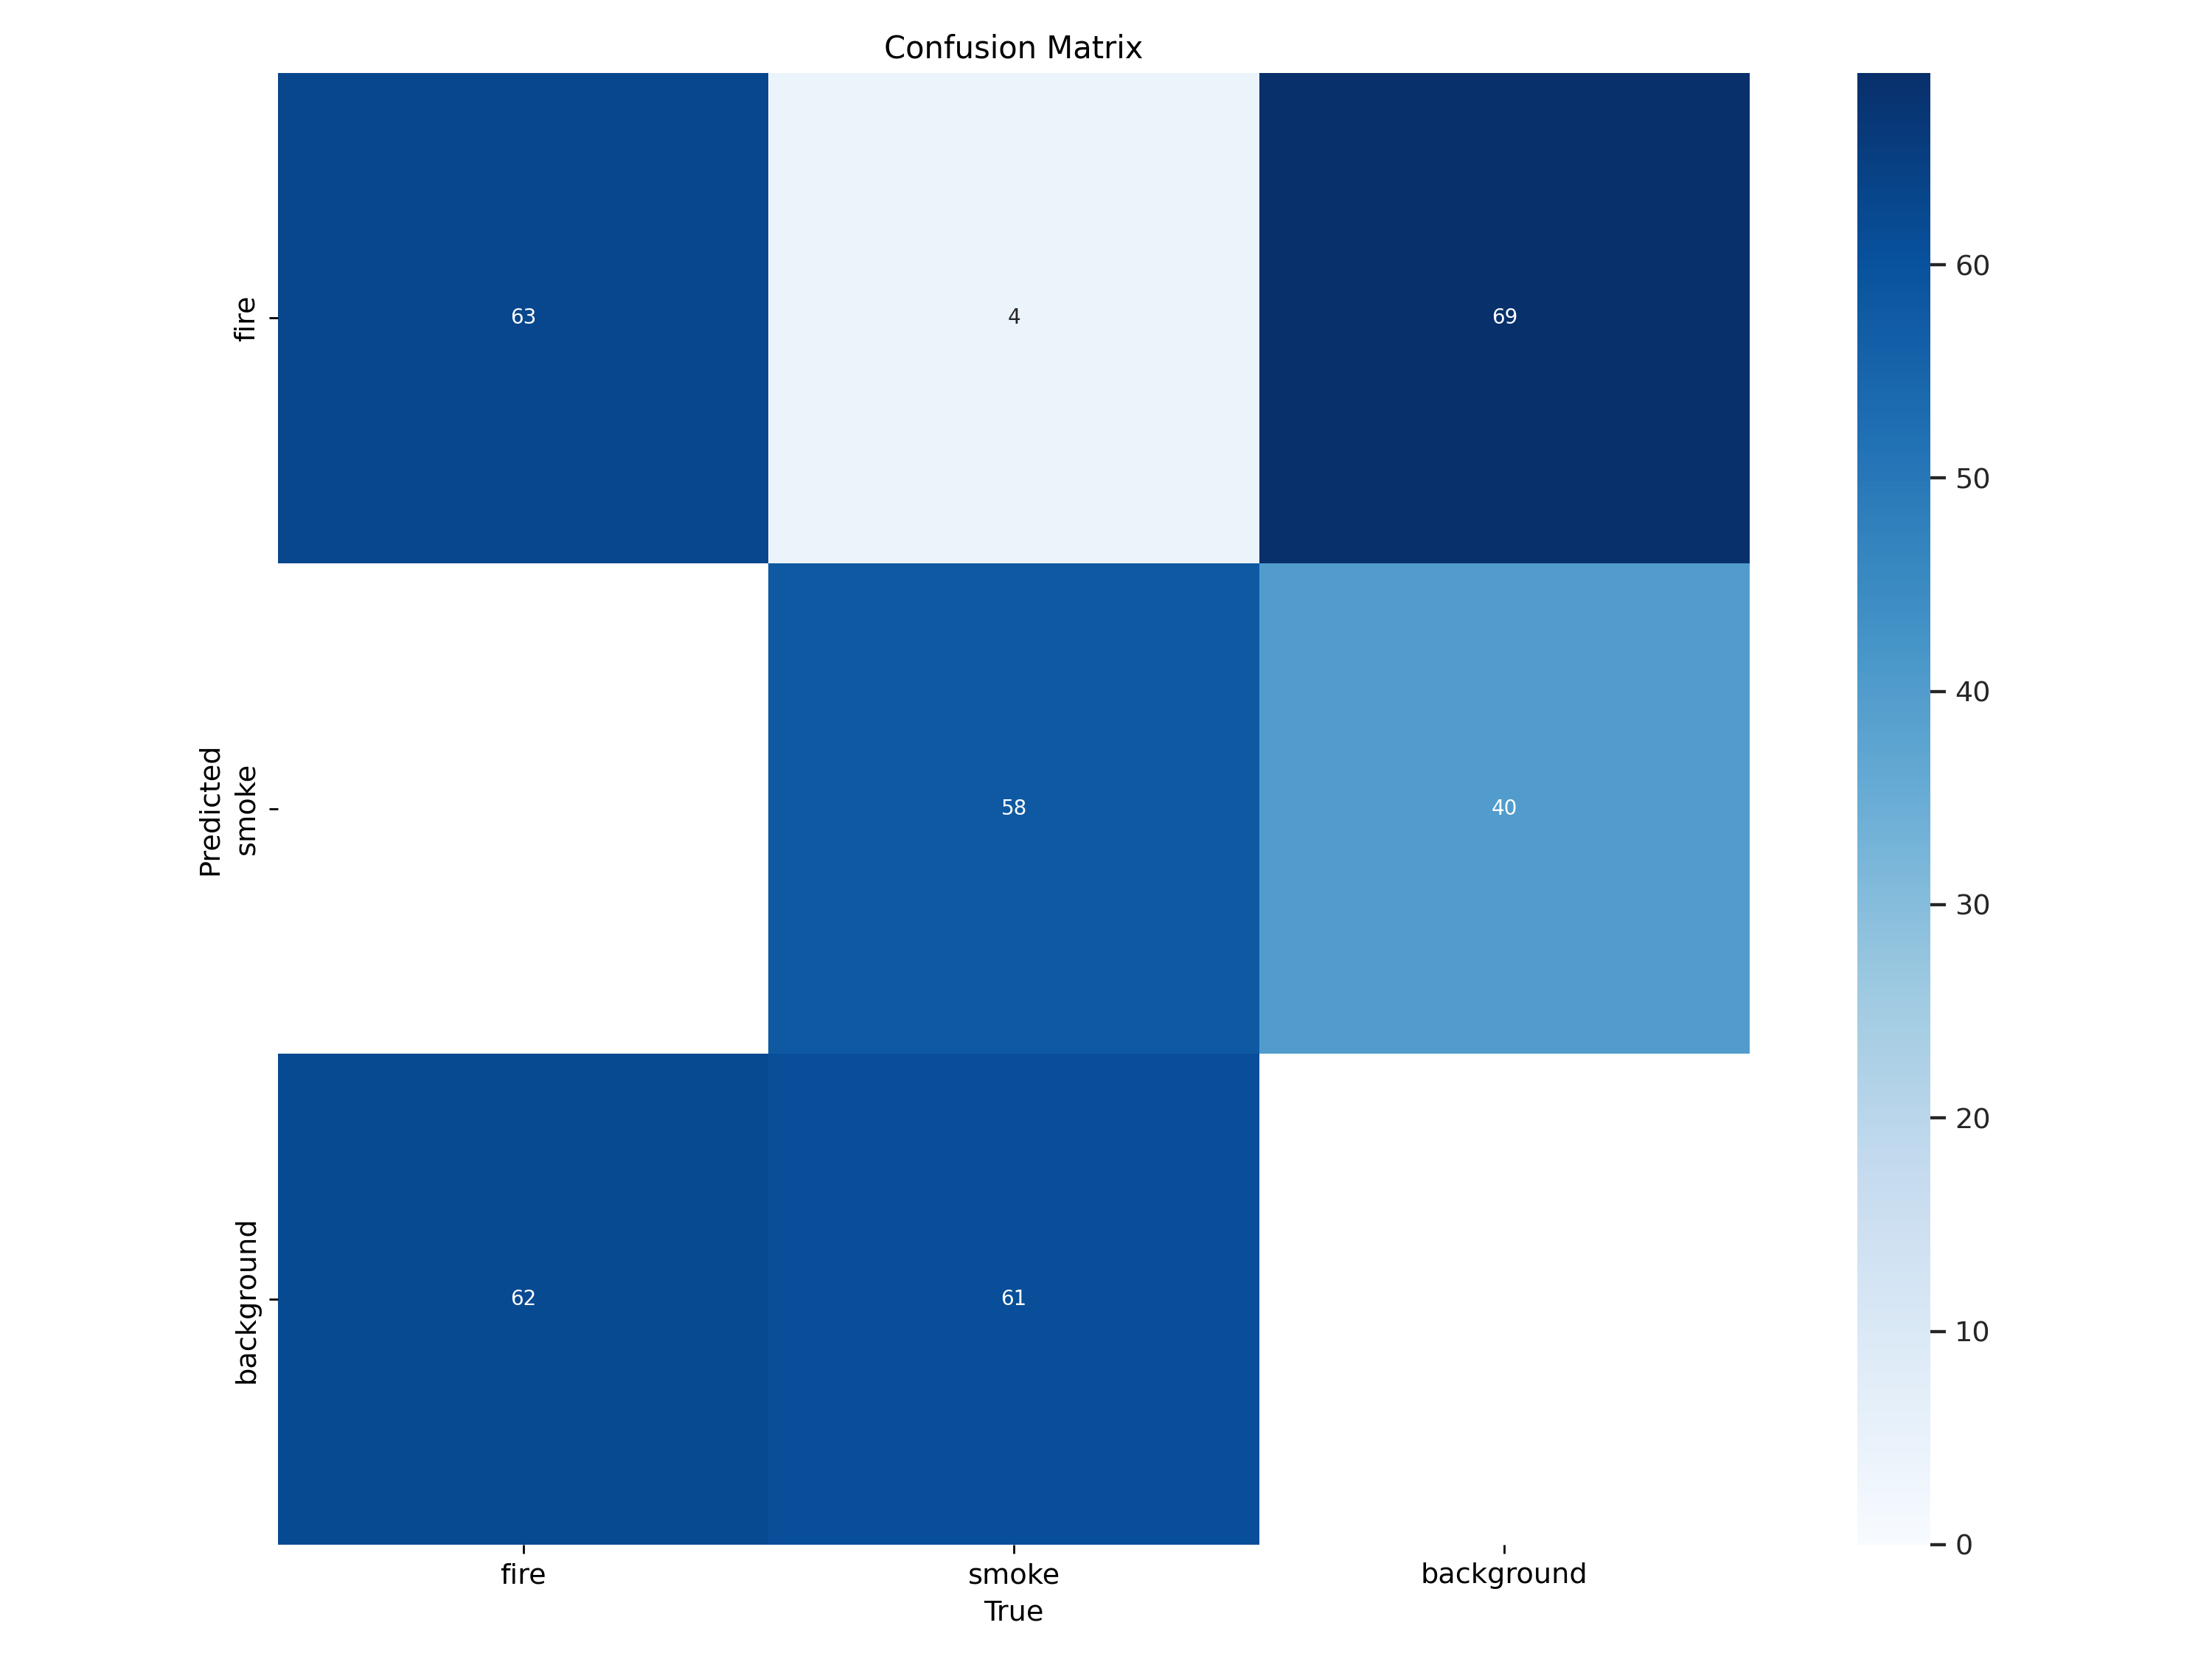

In [ ]:
from IPython.display import Image
import os

HOME = os.getcwd()  # atau langsung "/content"

# ganti direktori jika perlu
%cd {HOME}

# tampilkan confusion matrix
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


/content


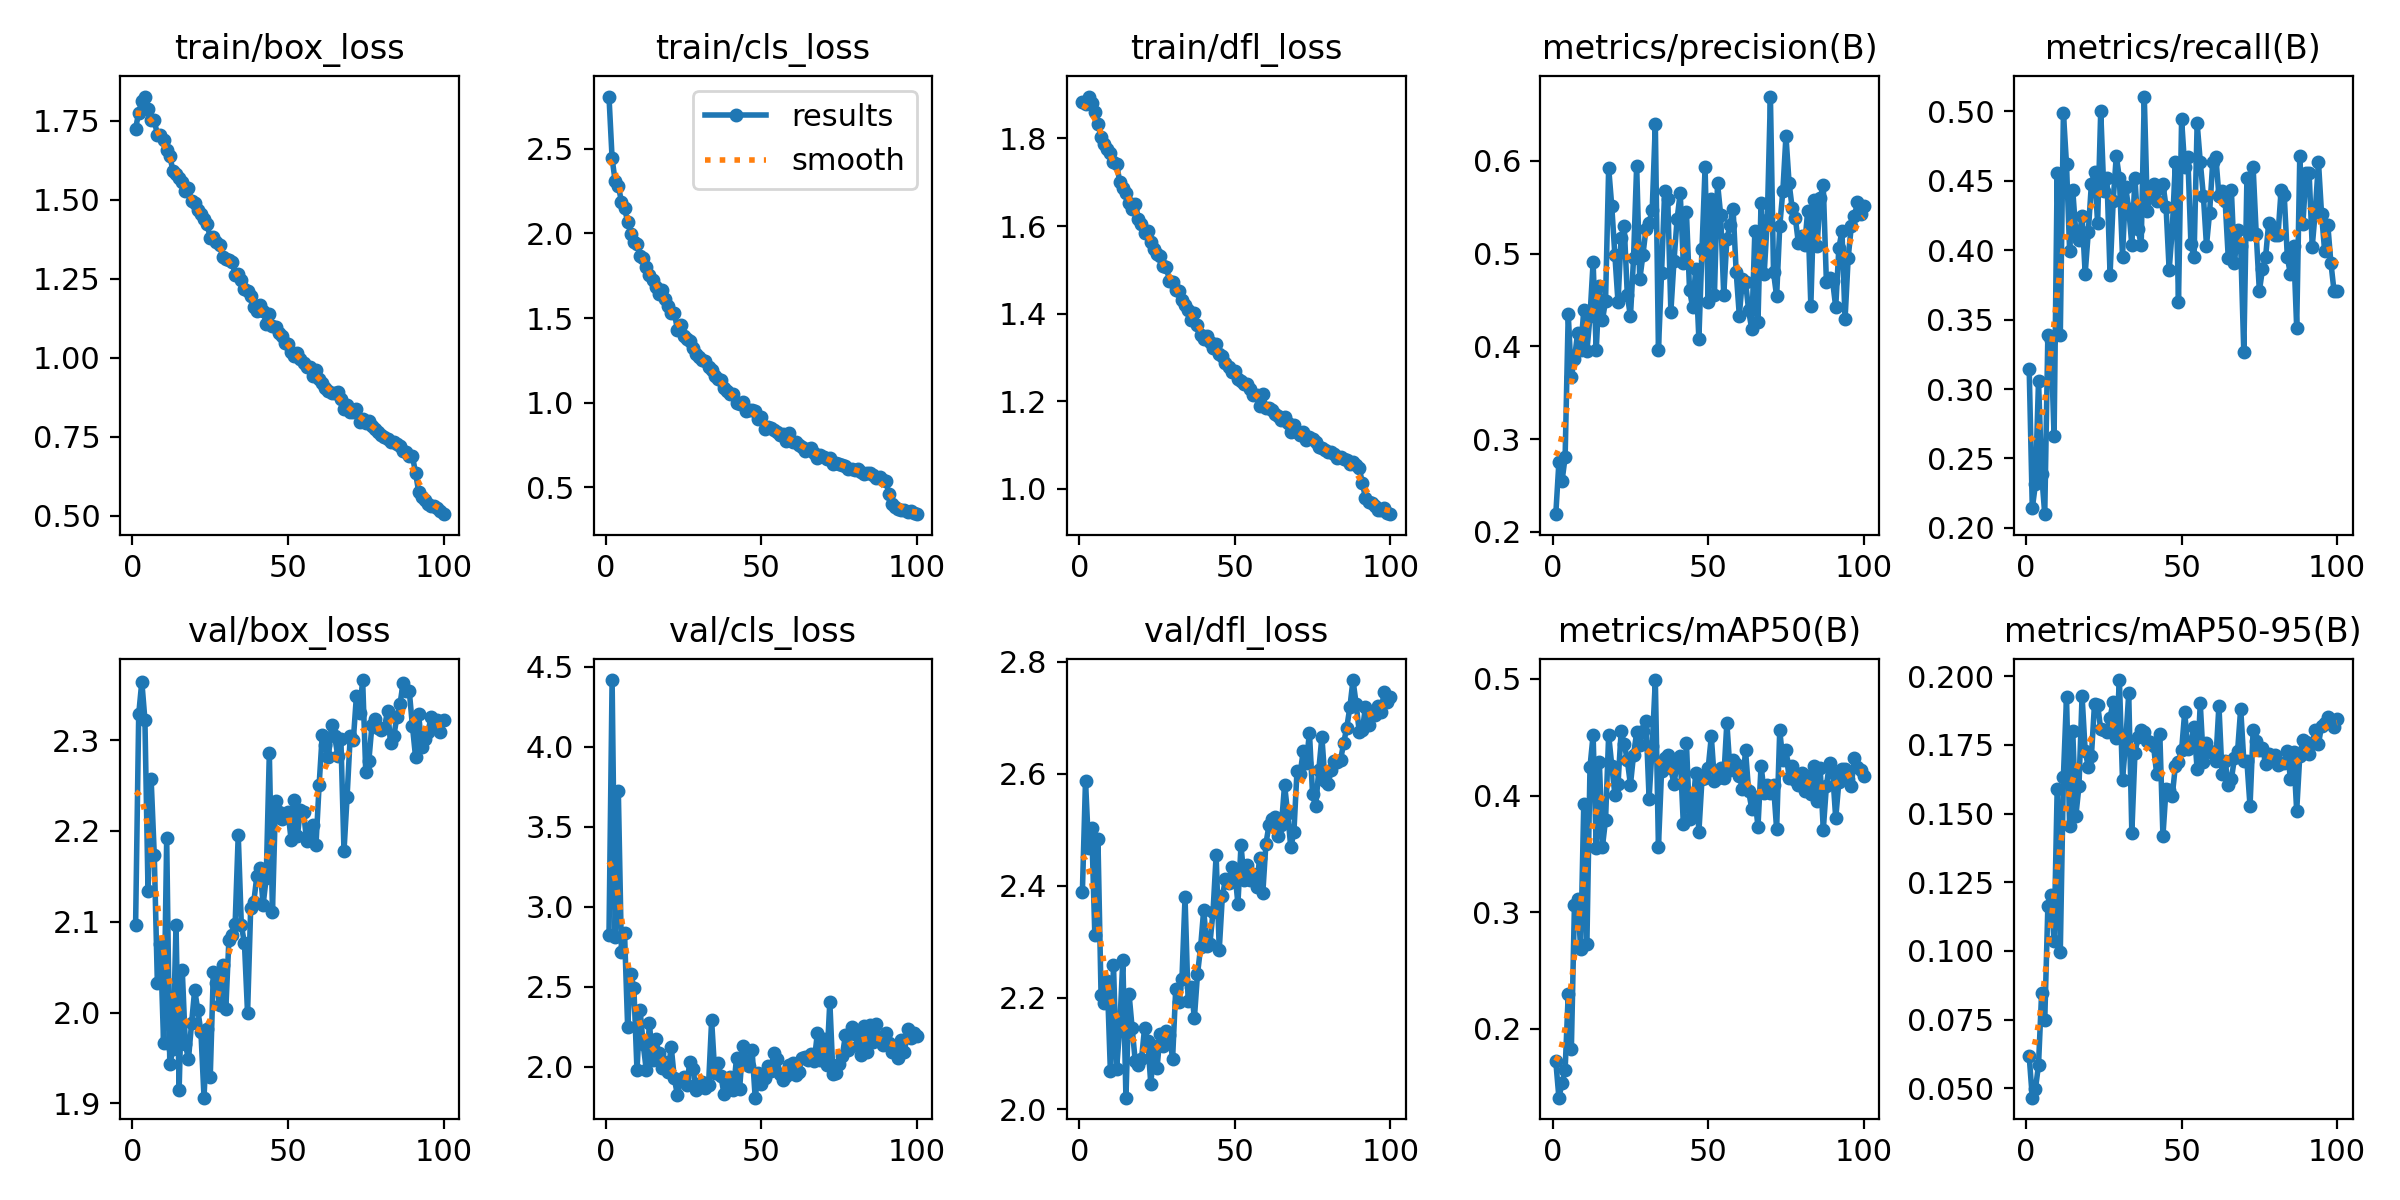

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
# Export model after training
model.export(format="onnx")
